In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [5]:
customers = pd.read_csv('./olist_customers_dataset.csv', sep=",")
locations = pd.read_csv('./olist_geolocation_dataset.csv', sep=",")
order_items = pd.read_csv('./olist_order_items_dataset.csv', sep=",")
order_payments = pd.read_csv('./olist_order_payments_dataset.csv', sep=",")
order_reviews = pd.read_csv('./olist_order_reviews_dataset.csv', sep=",")
orders = pd.read_csv('./olist_orders_dataset.csv', sep=",")
products = pd.read_csv('./olist_products_dataset.csv', sep=",")
sellers = pd.read_csv('./olist_sellers_dataset.csv', sep=",")
product_category_name = pd.read_csv('./product_category_name_translation.csv', sep=",")

In [11]:
order_payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.31
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.80
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.77
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.54


In [12]:
orders


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
...,...,...,...,...,...,...,...,...
99436,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28 00:00:00
99437,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02 00:00:00
99438,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27 00:00:00
99439,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15 00:00:00


In [13]:
merged_df = pd.merge(
    orders,
    order_payments,
    on='order_id',   # passe das an die gemeinsame Spalte an
    how='outer',     # outer, damit alles enthalten bleibt
    suffixes=('', '_dup')  # doppelte Spalten aus dem zweiten DF werden mit '_dup' gekennzeichnet
)

In [14]:
merged_df = merged_df.loc[:, ~merged_df.columns.str.endswith('_dup')]

In [19]:
merged_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,1.0,credit_card,2.0,72.19
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00,1.0,credit_card,3.0,259.83
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00,1.0,credit_card,5.0,216.87
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00,1.0,credit_card,2.0,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00,1.0,credit_card,3.0,218.04
...,...,...,...,...,...,...,...,...,...,...,...,...
103882,fffc94f6ce00a00581880bf54a75a037,b51593916b4b8e0d6f66f2ae24f2673d,delivered,2018-04-23 13:57:06,2018-04-25 04:11:01,2018-04-25 12:09:00,2018-05-10 22:56:40,2018-05-18 00:00:00,1.0,boleto,1.0,343.40
103883,fffcd46ef2263f404302a634eb57f7eb,84c5d4fbaf120aae381fad077416eaa0,delivered,2018-07-14 10:26:46,2018-07-17 04:31:48,2018-07-17 08:05:00,2018-07-23 20:31:55,2018-08-01 00:00:00,1.0,boleto,1.0,386.53
103884,fffce4705a9662cd70adb13d4a31832d,29309aa813182aaddc9b259e31b870e6,delivered,2017-10-23 17:07:56,2017-10-24 17:14:25,2017-10-26 15:13:14,2017-10-28 12:22:22,2017-11-10 00:00:00,1.0,credit_card,3.0,116.85
103885,fffe18544ffabc95dfada21779c9644f,b5e6afd5a41800fdf401e0272ca74655,delivered,2017-08-14 23:02:59,2017-08-15 00:04:32,2017-08-15 19:02:53,2017-08-16 21:59:40,2017-08-25 00:00:00,1.0,credit_card,3.0,64.71


In [20]:
merged_df = merged_df.dropna(subset=[
    'payment_sequential',
    'payment_type',
    'payment_installments',
    'payment_value'
])

Anzahl Duplikate: 0


In [ ]:
# Convert to date and time data type

In [24]:
merged_df['order_purchase_timestamp'] = pd.to_datetime(merged_df['order_purchase_timestamp'], yearfirst=True)

/var/folders/gq/qy25ht6n47v_kkd7kj866zgr0000gn/T/ipykernel_4389/745205958.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['order_purchase_timestamp'] = pd.to_datetime(merged_df['order_purchase_timestamp'], yearfirst=True)


In [ ]:
# Extract date and time from order_purchase_timestamp

In [25]:
merged_df['year'] = merged_df['order_purchase_timestamp'].dt.year
merged_df['month'] = merged_df['order_purchase_timestamp'].dt.month
merged_df['date'] = merged_df['order_purchase_timestamp'].dt.day

/var/folders/gq/qy25ht6n47v_kkd7kj866zgr0000gn/T/ipykernel_4389/1629891411.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['year'] = merged_df['order_purchase_timestamp'].dt.year
/var/folders/gq/qy25ht6n47v_kkd7kj866zgr0000gn/T/ipykernel_4389/1629891411.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['month'] = merged_df['order_purchase_timestamp'].dt.month
/var/folders/gq/qy25ht6n47v_kkd7kj866zgr0000gn/T/ipykernel_4389/1629891411.py:3: SettingWithCopyWarning: 
A value is trying 

In [ ]:
# Trends of order month to month

# We want to see the sales performance and trends from month to month

In [26]:
merged_df['month_year'] = merged_df['order_purchase_timestamp'].dt.strftime('%Y-%m')

/var/folders/gq/qy25ht6n47v_kkd7kj866zgr0000gn/T/ipykernel_4389/166848366.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['month_year'] = merged_df['order_purchase_timestamp'].dt.strftime('%Y-%m')


In [ ]:
# Group by order

In [27]:
order_per_month = merged_df.groupby(['month_year']).count()[['order_id']].reset_index()

In [ ]:
# Exclude last month because only 1 records found

In [28]:
order_per_month = order_per_month.iloc[:-1]

In [ ]:
# Visualization

Plot erstellt, versuche anzuzeigen...


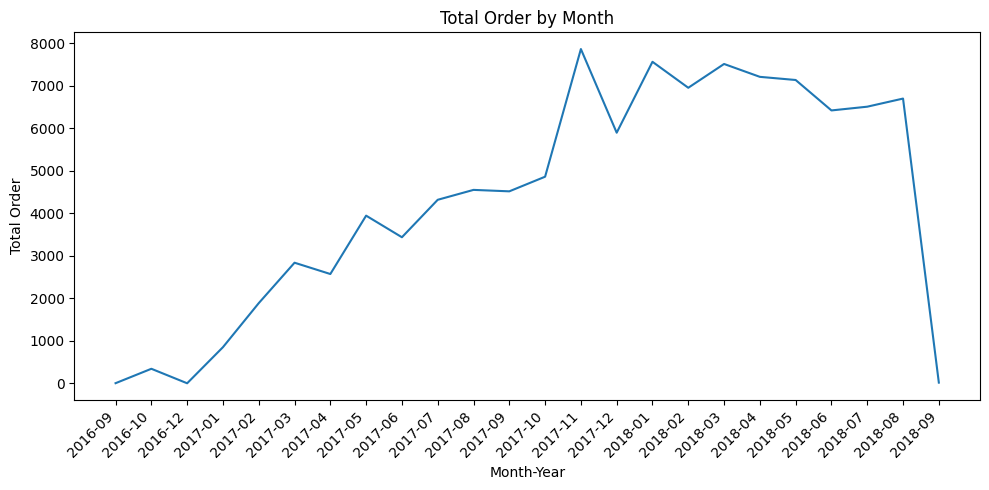

plt.show() ausgeführt.
--- Minimal Plot Test Ended ---


In [29]:
try:
    fig, ax = plt.subplots(figsize=(10, 5)) # Kleinere Größe zum Testen
    sns.lineplot(data=order_per_month, x='month_year', y='order_id', ax=ax)
    plt.title("Total Order by Month") # Einfacher Titel
    plt.xlabel("Month-Year")
    plt.ylabel("Total Order")
    plt.xticks(rotation=45, ha='right') # Grundlegende Rotation beibehalten
    plt.tight_layout()
    print("Plot erstellt, versuche anzuzeigen...") # Hinzugefügt für Klarheit
    plt.show()
    print("plt.show() ausgeführt.") # Hinzugefügt für Klarheit

except Exception as e:
    print(f"Fehler während des minimalen Plot-Tests: {e}")

print("--- Minimal Plot Test Ended ---") # Hinzugefügt für Klarheit

In [ ]:
# Total Revenue Olist:

In [ ]:
#Summe aller payment_values nach Jahren:

'# Schritt 1: Jahr aus der Datumsspalte extrahieren (angenommen wir nutzen 'order_purchase_timestamp')
merged_df['year'] = pd.to_datetime(merged_df['order_purchase_timestamp']).dt.year

# Schritt 2: Summe der payment_values nach Jahr berechnen
yearly_totals = merged_df.groupby('year')['payment_value'].sum().reset_index()

# Ergebnis anzeigen
print(yearly_totals)'

In [36]:
# Schritt 1: Jahr aus der Datumsspalte extrahieren
merged_df['year'] = pd.to_datetime(merged_df['order_purchase_timestamp']).dt.year

# Schritt 2: Summe der payment_values nach Jahr berechnen (in BRL)
yearly_totals = merged_df.groupby('year')['payment_value'].sum().reset_index()

# Schritt 3: Umrechnung in Euro
yearly_totals['payment_value_eur'] = yearly_totals['payment_value'] * 0.15

# Ergebnis anzeigen
print(yearly_totals)

   year  payment_value  payment_value_eur
0  2016       59362.34       8.904351e+03
1  2017     7249746.73       1.087462e+06
2  2018     8699763.05       1.304964e+06


/var/folders/gq/qy25ht6n47v_kkd7kj866zgr0000gn/T/ipykernel_4389/779200726.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['year'] = pd.to_datetime(merged_df['order_purchase_timestamp']).dt.year


In [40]:
# Jahr extrahieren
merged_df['year'] = pd.to_datetime(merged_df['order_purchase_timestamp']).dt.year

# Summe in Euro pro Jahr berechnen (direkt umgerechnet)
yearly_totals_eur = merged_df.groupby('year')['payment_value'].sum().mul(0.15).round(2).reset_index()

# Spalte umbenennen für Klarheit
yearly_totals_eur.rename(columns={'payment_value': 'payment_value_eur'}, inplace=True)

# Ausgabe
print(yearly_totals_eur)

   year  payment_value_eur
0  2016            8904.35
1  2017         1087462.01
2  2018         1304964.46


/var/folders/gq/qy25ht6n47v_kkd7kj866zgr0000gn/T/ipykernel_4389/3208650619.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['year'] = pd.to_datetime(merged_df['order_purchase_timestamp']).dt.year


In [41]:
# Summe der Payment_values (Umsätze) nach Jahren (R$) Grafische Darstellung:

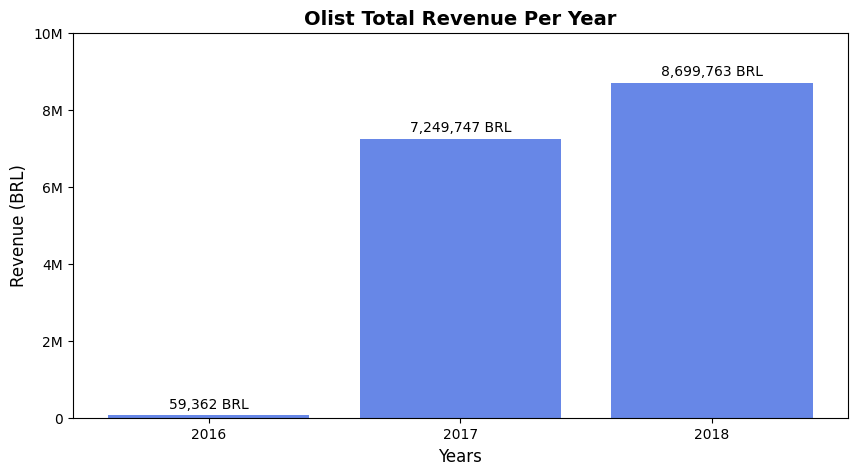

In [42]:
years = [2016, 2017, 2018]
revenue = [59362.34, 7249746.73, 8699763.05]

# Diagramm erstellen
fig, ax = plt.subplots(figsize=(10, 5))

# Balkendiagramm
bars = ax.bar(years, revenue, color="royalblue", alpha=0.8)

# Achsenbeschriftungen und Titel setzen
ax.set_xlabel("Years", fontsize=12)
ax.set_ylabel("Revenue (BRL)", fontsize=12)
ax.set_title("Olist Total Revenue Per Year", fontsize=14, fontweight="bold")

# Y-Achse in Millionen BRL
ax.set_yticks([0, 2_000_000, 4_000_000, 6_000_000, 8_000_000, 10_000_000])
ax.set_yticklabels(["0", "2M", "4M", "6M", "8M", "10M"])

# X-Achse nur mit ganzen Jahren
ax.set_xticks(years)
ax.set_xticklabels([str(year) for year in years])

# Hintergrundlinien entfernen
ax.grid(False)

# Werte direkt auf die Balken schreiben
for bar in bars:
    height = bar.get_height()
    ax.annotate(f"{height:,.0f} BRL",
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),
                textcoords="offset points",
                ha='center', fontsize=10, color="black")

# Diagramm anzeigen
plt.show()

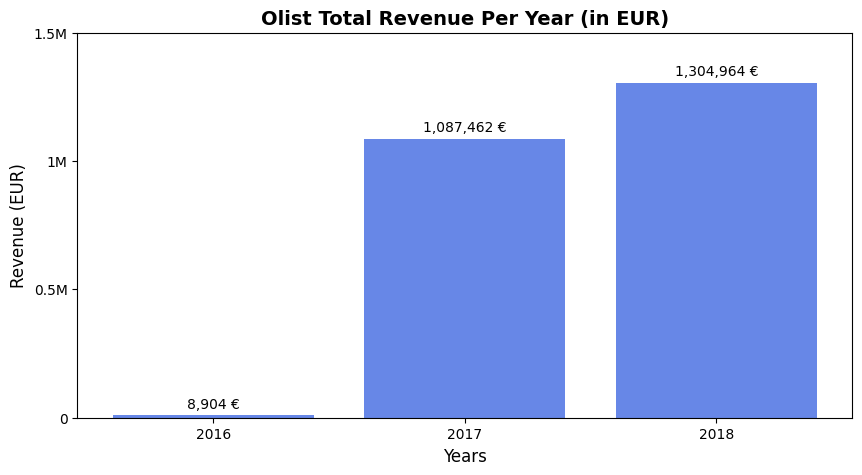

In [43]:
# Neue Daten in Euro
years = [2016, 2017, 2018]
revenue = [8904.35, 1087462.01, 1304964.46]  # in EUR

# Diagramm erstellen
fig, ax = plt.subplots(figsize=(10, 5))

# Balkendiagramm
bars = ax.bar(years, revenue, color="royalblue", alpha=0.8)

# Achsenbeschriftungen und Titel setzen
ax.set_xlabel("Years", fontsize=12)
ax.set_ylabel("Revenue (EUR)", fontsize=12)
ax.set_title("Olist Total Revenue Per Year (in EUR)", fontsize=14, fontweight="bold")

# Y-Achse in Millionen EUR (angepasst!)
ax.set_yticks([0, 500_000, 1_000_000, 1_500_000])
ax.set_yticklabels(["0", "0.5M", "1M", "1.5M"])

# X-Achse
ax.set_xticks(years)
ax.set_xticklabels([str(year) for year in years])

# Hintergrundlinien entfernen
ax.grid(False)

# Werte direkt auf die Balken schreiben
for bar in bars:
    height = bar.get_height()
    ax.annotate(f"{height:,.0f} €",
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 5),
                textcoords="offset points",
                ha='center', fontsize=10, color="black")

# Diagramm anzeigen
plt.show()

In [ ]:
# Prozentuale Veränderung der Umsätze:

In [32]:
# Prozentuale Veränderung berechnen
yearly_totals['pct_change'] = yearly_totals['payment_value'].pct_change() * 100

# Ergebnis anzeigen
print(yearly_totals)


   year  payment_value    pct_change
0  2016       59362.34           NaN
1  2017     7249746.73  12112.703761
2  2018     8699763.05     20.000924


In [ ]:
# Prozentuale Veränderung der Umsätze (gerundet):

In [33]:
yearly_totals['pct_change'] = (yearly_totals['payment_value'].pct_change() * 100).round(2)

# Ergebnis anzeigen
print(yearly_totals)

   year  payment_value  pct_change
0  2016       59362.34         NaN
1  2017     7249746.73     12112.7
2  2018     8699763.05        20.0
